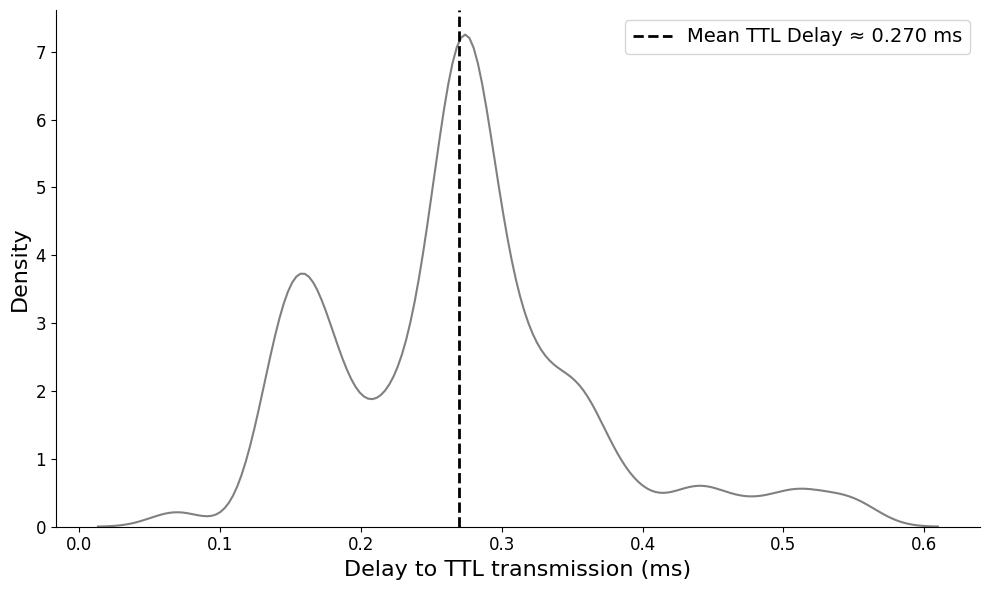

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Pi_TTL_SPEED_TEST_CLEANED.csv')
df["Delay_ms"] = df["Delay_to_TTL_Start_sec"] * 1000

# Load port summary file and calculate global mean delay
summary = pd.read_csv('Pi_TTL_Timing_Summary_Per_Port.csv')
mean_delay_sec = summary["Mean_Delay"].mean()
mean_delay_ms = mean_delay_sec * 1000

# Plot KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="Delay_ms",
    bw_adjust=0.5,
    fill=False,
    color="gray"
)

# Add dashed line at mean
plt.axvline(x=mean_delay_ms, color='black', linestyle='--', linewidth=2,
            label=f'Mean TTL Delay ≈ {mean_delay_ms:.3f} ms')

# Aesthetics
plt.title("", fontsize=5)
plt.xlabel("Delay to TTL transmission (ms)", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
sns.despine(top=True, right=True)
plt.tight_layout()
# plt.savefig("C:\Personal Hamid\Papers\IBNS_2025\Figs\Bench_TTL.pdf", dpi=220, bbox_inches="tight")  
plt.show()
